# Dataset

**goodbooks-10**: https://github.com/zygmuntz/goodbooks-10k

# Getting the data

In [1]:
#!wget "https://github.com/zygmuntz/goodbooks-10k/releases/download/v1.0/goodbooks-10k.zip" -O goodbooks-10k.zip
#!unzip goodbooks-10k.zip
#!rm goodbooks-10k.zip

## Store it into Pandas dataframe

In [1]:
import datatable as dt

In [2]:
%%time

book_data = dt.fread("books.csv").to_pandas()
ratings_data = dt.fread("ratings.csv").to_pandas()
booktags_data = dt.fread("book_tags.csv").to_pandas()
tags_data= dt.fread("tags.csv").to_pandas()
toread_data = dt.fread("to_read.csv").to_pandas()

CPU times: user 1.38 s, sys: 361 ms, total: 1.74 s
Wall time: 4.6 s


# Taking a peek

In [3]:
book_data.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
book_data.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [5]:
book_data.shape

(10000, 23)

**Meta data about the 10k books**
We have a bunch of ids, author / title / publication year, rating info, images.

In [6]:
ratings_data.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [7]:
ratings_data.rating.unique()

array([5, 4, 3, 2, 1], dtype=int32)

In [8]:
ratings_data.duplicated().sum()

0

In [9]:
ratings_data.shape

(5976479, 3)

Classic user / item / rating table. Only integers. No rating of 0. Nearly 6M entries.

In [10]:
tags_data.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [11]:
tags_data.shape

(34252, 2)

Some tags, not to sure what this corresponds to yet.

In [12]:
booktags_data.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [13]:
booktags_data.shape

(999912, 3)

The count of each tag for each book.

In [14]:
toread_data.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [15]:
toread_data.shape

(912705, 2)

User / book where book is in the "to read" list of the user. (Not really useful recommending it)

#  Collaborative filtering baseline

In [6]:
from fastai.collab import *
from fastai.tabular.all import *

Creating dataloaders with 20% kept out for validation set. Batch size of 64.

In [13]:
dls = CollabDataLoaders.from_df(ratings_data, user_name="user_id", item_name="book_id")
dls.show_batch()

,user_id,book_id,rating
0,22730,1954,5
1,34367,56,3
2,9896,325,5
3,48260,199,3
4,45356,6385,4
5,2099,9478,3
6,44048,141,5
7,29695,4166,3
8,9682,8024,3
9,38742,183,5


Collaborative filtering with 50 latent factors for users and books.

In [14]:
embs = get_emb_sz(dls)
embs

[(53425, 600), (10001, 278)]

Cross-product between embeddings requires embeddings of the same size.
We will pick something in between 600 and 278, for example: 400.

In [15]:
learn = collab_learner(dls, n_factors=400, y_range=(-0.5, 5.5))

SuggestedLRs(lr_min=0.33113112449646, lr_steep=3.311311274956097e-06)

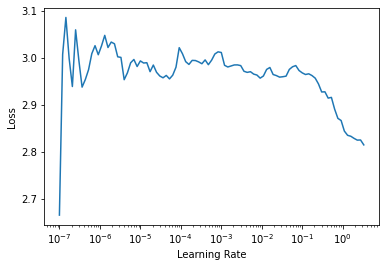

In [16]:
learn.lr_find()

In [17]:
learn.fit_one_cycle(20, 3e-3)

epoch,train_loss,valid_loss,time
0,0.776637,0.757634,19:02
1,0.723827,0.746814,18:53
2,0.757599,0.798994,19:01
3,0.851959,0.883705,17:39
4,0.898761,0.925005,17:40
5,0.929110,0.918584,17:08
6,0.892446,0.907375,17:53
7,0.853105,0.885791,18:08
8,0.808654,0.859646,17:58
9,0.749844,0.830360,18:10


In [18]:
learn.summary()

EmbeddingDotBias (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 400            
Embedding                                 21370000   True      
Embedding                                 4000400    True      
____________________________________________________________________________
                     64 x 1              
Embedding                                 53425      True      
Embedding                                 10001      True      
____________________________________________________________________________

Total params: 25,433,826
Total trainable params: 25,433,826
Total non-trainable params: 0

Optimizer used: <function Adam at 0x7f0efedafaf0>
Loss function: FlattenedLoss of MSELoss()

Model unfrozen

Callbacks:
  - TrainEvalCallback
  - Recorder
  - ProgressCallback

In [19]:
#save_pickle("save/collab_baseline.pkl", learn)

In [26]:
learn = collab_learner(dls, n_factors=350, y_range=(-0.5, 5.5))

SuggestedLRs(lr_min=0.2754228591918945, lr_steep=9.12010818865383e-07)

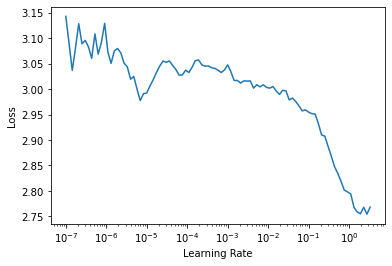

In [27]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(26, 1e-3, wd=0.1, cbs=[SaveModelCallback(every_epoch=True)])

epoch,train_loss,valid_loss,time


In [ ]:
learn.summary()

In [ ]:
#save_pickle("save/collab_baseline.pkl", learn)

# Exploratory data analysis

# Predicting average book rating using only book info

We are going to leverage random forest to help us in this task.

## Feature engineering

## Info in title

In [16]:
import re
import pandas as pd

In [17]:
def extract_series(title):
    matches = re.search(r'^(?P<Title>.+)\s\((?P<Series>.+), #(?P<Number>\d)\)$', title)
    if matches is None:
        series = None
        number = 1
    else:
        title = matches.group('Title')
        series = matches.group('Series')
        number = matches.group('Number')
    return title, series, int(number)

In [18]:
title_data = book_data['title'].apply(extract_series).apply(pd.Series)
title_data.columns = ['title', 'series', 'volume_number']

In [19]:
title_data

,title,series,volume_number
0,The Hunger Games,The Hunger Games,1
1,Harry Potter and the Sorcerer's Stone,Harry Potter,1
2,Twilight,Twilight,1
3,To Kill a Mockingbird,None,1
4,The Great Gatsby,None,1
...,...,...,...
9995,Bayou Moon,The Edge,2
9996,Means of Ascent,The Years of Lyndon Johnson,2
9997,The Mauritius Command,None,1
9998,Cinderella Ate My Daughter: Dispatches from th...,None,1


In [20]:
book_data = book_data.drop('title', axis=1)
book_data = pd.concat([book_data, title_data], axis=1)

In [21]:
book_data.iloc[:3,-3:]

,title,series,volume_number
0,The Hunger Games,The Hunger Games,1
1,Harry Potter and the Sorcerer's Stone,Harry Potter,1
2,Twilight,Twilight,1


## Leveraging tags

In [22]:
import numpy as np

In [23]:
nb_tags, _ = len(tags_data.tag_id.unique()), tags_data.tag_id.max() + 1 # +1 since first id is 0
nb_tags, _

(34252, 34252)

Don't think there is any hole.

In [24]:
tags_data.head(5)

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [25]:
tags_data.tail(5)

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


**We are drowning in tags!**
Users can create their own tags, which doesn't help. Instead we will use the tags provided by goodbooks genres, namely [these ones](https://www.goodreads.com/genres)

In [26]:
genres = ["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics", "Comics", "Contemporary", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction", "Gay and Lesbian", "Graphic Novels", "Historical Fiction", "History", "Horror", "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", "Paranormal", "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction", "Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]
genres_tags = [genre.lower().replace(" and ", "-").replace(" ", "-").replace("'s", "") for genre in genres]

In [27]:
len(genres), len(tags_data[tags_data['tag_name'].isin(genres_tags)])

(40, 40)

In [28]:
nb_genres = len(genres)

We now have all the genres! Let's filter the tags and transform the count into True-False.

In [29]:
genres_tag_ids = tags_data[tags_data['tag_name'].isin(genres_tags)].tag_id

In [30]:
bookgenres_data = booktags_data[booktags_data['tag_id'].isin(genres_tag_ids)]

In [31]:
tag_genre_map = {tag: genres_tags.index(tags_data.loc[tag].tag_name) for tag in genres_tag_ids}

In [32]:
grouped_genres_counts = bookgenres_data.groupby('goodreads_book_id').agg(lambda x: x.tolist())
grouped_genres_counts.head(1)

,tag_id,count
goodreads_book_id,,
1,"[11305, 33114, 11743, 6857, 7457, 22973, 20939...","[37174, 12716, 9954, 1560, 958, 673, 465, 334,..."


In [33]:
def one_hot_from_genre_count_list(tags):
    one_hot = np.repeat(0, nb_genres)
    genres = [tag_genre_map[tag] for tag in tags]
    one_hot[genres] = 1
    return pd.Series(one_hot)

In [34]:
one_hot = grouped_genres_counts.apply(lambda x: one_hot_from_genre_count_list(x['tag_id']), axis=1)
one_hot.columns = genres

In [35]:
one_hot

,Art,Biography,Business,Chick Lit,Children's,Christian,Classics,Comics,Contemporary,Cookbooks,...,Romance,Science,Science Fiction,Self Help,Suspense,Spirituality,Sports,Thriller,Travel,Young Adult
goodreads_book_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31538647,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31845516,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
32075671,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [36]:
#one_hot.to_csv('save/genres_one_hot.csv')

In [37]:
one_hot.reset_index(inplace=True)

In [38]:
book_with_genres = book_data.merge(one_hot)

In [39]:
book_with_genres

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,Romance,Science,Science Fiction,Self Help,Suspense,Spirituality,Sports,Thriller,Travel,Young Adult
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,1,0,1,0,1,0,0,1,0,1
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,0,0,0,0,0,0,0,0,0,1
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,0,0,1,0,0,0,0,0,0,1
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,0,0,0,0,0,0,0,0,0,1
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,1,0,0,0,0,0,0,0,0,0
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,0,0,0,0,0,0,0,0,0,0
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,0,0,0,0,0,0,0,0,0,0
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#book_with_genres.to_csv('save/book_w_genres.csv', index=False)

In [41]:
book_complete_data = ratings_data.merge(book_with_genres)

In [42]:
book_complete_data

,user_id,book_id,rating,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,Romance,Science,Science Fiction,Self Help,Suspense,Spirituality,Sports,Thriller,Travel,Young Adult
0,1,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,1,0,0,0,1,0,0,1,0,0
1,11,258,3,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,1,0,0,0,1,0,0,1,0,0
2,143,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,1,0,0,0,1,0,0,1,0,0
3,242,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,1,0,0,0,1,0,0,1,0,0
4,325,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976474,36773,9548,5,30839185,30839185,51437887,4,,NaN,L.J. Shen,...,1,0,0,0,1,0,0,0,0,1
5976475,50673,9548,4,30839185,30839185,51437887,4,,NaN,L.J. Shen,...,1,0,0,0,1,0,0,0,0,1
5976476,45213,9548,3,30839185,30839185,51437887,4,,NaN,L.J. Shen,...,1,0,0,0,1,0,0,0,0,1
5976477,12872,9548,4,30839185,30839185,51437887,4,,NaN,L.J. Shen,...,1,0,0,0,1,0,0,0,0,1


In [44]:
#book_complete_data.to_csv('save/book_complete.csv', index=False)

### Handling strings and missing data

In [45]:
from fastai.tabular.all import *

In [46]:
procs = [Categorify, FillMissing]

In [47]:
dep_var = 'rating'

In [48]:
continuous, categorical = cont_cat_split(book_complete_data, 2, dep_var=dep_var)

In [49]:
continuous

['user_id',
 'book_id',
 'goodreads_book_id',
 'best_book_id',
 'work_id',
 'books_count',
 'isbn13',
 'original_publication_year',
 'average_rating',
 'ratings_count',
 'work_ratings_count',
 'work_text_reviews_count',
 'ratings_1',
 'ratings_2',
 'ratings_3',
 'ratings_4',
 'ratings_5',
 'volume_number']

In [50]:
categorical

['isbn',
 'authors',
 'original_title',
 'language_code',
 'image_url',
 'small_image_url',
 'title',
 'series',
 'Art',
 'Biography',
 'Business',
 'Chick Lit',
 "Children's",
 'Christian',
 'Classics',
 'Comics',
 'Contemporary',
 'Cookbooks',
 'Crime',
 'Ebooks',
 'Fantasy',
 'Fiction',
 'Gay and Lesbian',
 'Graphic Novels',
 'Historical Fiction',
 'History',
 'Horror',
 'Humor and Comedy',
 'Manga',
 'Memoir',
 'Music',
 'Mystery',
 'Nonfiction',
 'Paranormal',
 'Philosophy',
 'Poetry',
 'Psychology',
 'Religion',
 'Romance',
 'Science',
 'Science Fiction',
 'Self Help',
 'Suspense',
 'Spirituality',
 'Sports',
 'Thriller',
 'Travel',
 'Young Adult']

In [51]:
msk = np.random.rand(len(book_complete_data)) < 0.3 # Only 10% for training for now (just to try out stuff)
train_idx = np.where(msk)[0]
valid_idx = np.where(~msk)[0]
splits = (list(train_idx), list(valid_idx))

In [52]:
book_tab = TabularPandas(book_complete_data, procs, categorical, continuous, y_names=dep_var, splits=splits)

In [53]:
len(book_tab.train), len(book_tab.valid)

(1793801, 4182678)

In [54]:
book_tab.show(3)

,isbn,authors,original_title,language_code,image_url,small_image_url,title,series,Art,Biography,Business,Chick Lit,Children's,Christian,Classics,Comics,Contemporary,Cookbooks,Crime,Ebooks,Fantasy,Fiction,Gay and Lesbian,Graphic Novels,Historical Fiction,History,Horror,Humor and Comedy,Manga,Memoir,Music,Mystery,Nonfiction,Paranormal,Philosophy,Poetry,Psychology,Religion,Romance,Science,Science Fiction,Self Help,Suspense,Spirituality,Sports,Thriller,Travel,Young Adult,isbn13_na,original_publication_year_na,user_id,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,volume_number,rating
1,143034901,"Carlos Ruiz Zafón, Lucia Graves",La sombra del viento,eng,https://images.gr-assets.com/books/1344545047m/1232.jpg,https://images.gr-assets.com/books/1344545047s/1232.jpg,"The Shadow of the Wind (The Cemetery of Forgotten Books, #1)",#na#,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,False,False,11,258,1232,1232,3209783,279,9.780143e+12,2001.0,4.24,263685,317554,24652,4789,11769,42214,101612,157170,1,3
2,143034901,"Carlos Ruiz Zafón, Lucia Graves",La sombra del viento,eng,https://images.gr-assets.com/books/1344545047m/1232.jpg,https://images.gr-assets.com/books/1344545047s/1232.jpg,"The Shadow of the Wind (The Cemetery of Forgotten Books, #1)",#na#,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,False,False,143,258,1232,1232,3209783,279,9.780143e+12,2001.0,4.24,263685,317554,24652,4789,11769,42214,101612,157170,1,4
7,143034901,"Carlos Ruiz Zafón, Lucia Graves",La sombra del viento,eng,https://images.gr-assets.com/books/1344545047m/1232.jpg,https://images.gr-assets.com/books/1344545047s/1232.jpg,"The Shadow of the Wind (The Cemetery of Forgotten Books, #1)",#na#,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,False,False,396,258,1232,1232,3209783,279,9.780143e+12,2001.0,4.24,263685,317554,24652,4789,11769,42214,101612,157170,1,3


In [55]:
book_tab.items.head(3)

,user_id,book_id,rating,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,Science Fiction,Self Help,Suspense,Spirituality,Sports,Thriller,Travel,Young Adult,isbn13_na,original_publication_year_na
1,11,258,3,1232,1232,3209783,279,1640,9.780143e+12,642,...,1,1,2,1,1,2,1,1,1,1
2,143,258,4,1232,1232,3209783,279,1640,9.780143e+12,642,...,1,1,2,1,1,2,1,1,1,1
7,396,258,3,1232,1232,3209783,279,1640,9.780143e+12,642,...,1,1,2,1,1,2,1,1,1,1


Under the hood, everything is numerical

In [56]:
save_path = Path()/'save/book_tab_30.pkl'

In [57]:
#save_pickle(save_path, book_tab)

### Creating the Random Forest

In [17]:
#book_tab = load_pickle(save_path)

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
def rf(xs, y, n_estimators=40, max_samples=100_000,
       max_features=0.5, min_samples_leaf=15, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True, random_state=42).fit(xs, y)

In [69]:
xs, y = book_tab.train.xs, book_tab.train.y
valid_xs, valid_y = book_tab.valid.xs, book_tab.valid.y

In [61]:
m = rf(xs, y)

In [62]:
from sklearn.metrics import mean_squared_error as mse

In [63]:
def m_mse(model, xs, y): return mse(y, m.predict(xs))

In [64]:
m_mse(m, xs, y), m_mse(m, valid_xs, valid_y)

(0.8904609668885247, 0.9080940281529053)

Not bad. Let's take a look at the most important variables.

In [65]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [66]:
rf_feat_importance(m, xs)[:20]

,cols,imp
58,average_rating,0.282995
50,user_id,0.216364
66,ratings_5,0.027622
62,ratings_1,0.027621
1,authors,0.026849
0,isbn,0.025865
54,work_id,0.024120
55,books_count,0.023867
63,ratings_2,0.023570
6,title,0.023527


We have a bunch of id columns that mean around the same thing. Let's only keep the book_id, see how it goes.

In [70]:
len(book_data.work_id.unique()), len(book_data.goodreads_book_id.unique()), len(book_data.best_book_id.unique()), len(book_data.isbn.unique()), len(book_data.isbn13.unique()) + book_data.isbn13.isna().sum() - 1

(10000, 10000, 10000, 9301, 9738)

I don't know why isbn and isbn13 are not entirely unique but I will still remove them.

In [71]:
to_drop = ['work_id', 'goodreads_book_id', 'best_book_id', 'isbn', 'isbn13', 'isbn13_na']

In [72]:
m = rf(xs.drop(to_drop, axis=1), y)
m_mse(m, xs.drop(to_drop, axis=1), y), m_mse(m, valid_xs.drop(to_drop, axis=1), valid_y)

(0.8906743824072378, 0.9078537185480658)

In [73]:
xs = xs.drop(to_drop, axis=1)
valid_xs = valid_xs.drop(to_drop, axis=1)

Around the same (slightly better) and our model is simpler to use at inference time.

**We already have a better model than our baseline**

### Keeping the important features

In [74]:
imp = rf_feat_importance(m, xs)

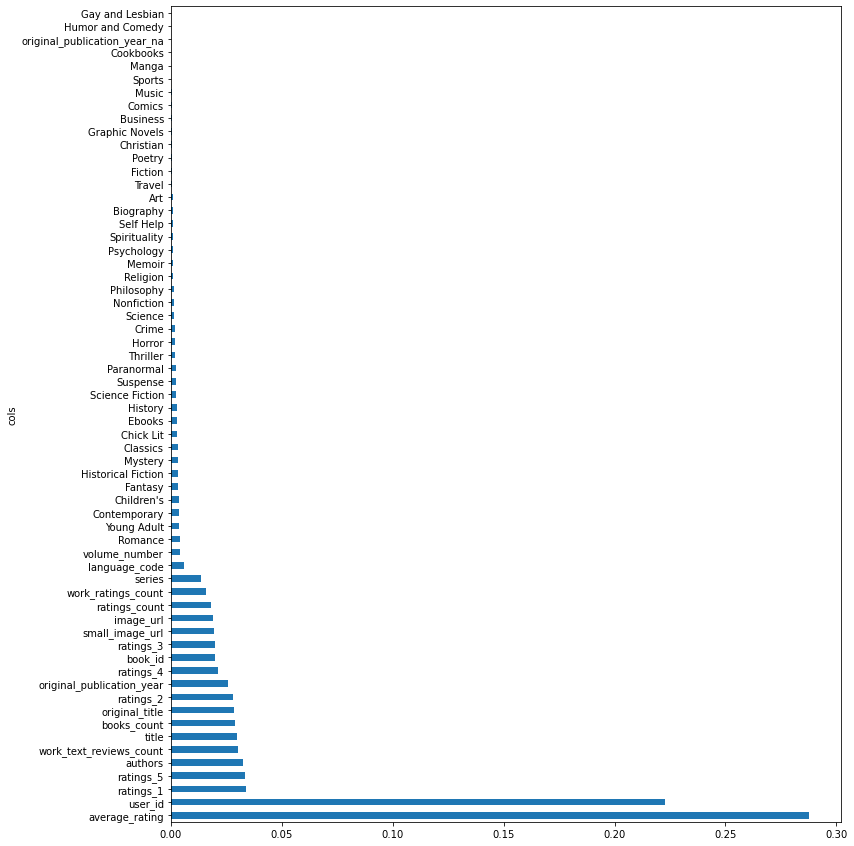

In [75]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,15), legend=False)

plot_fi(imp);

average_rating and user_id are by far the most important variables.

In [76]:
imp.head(50)

,cols,imp
52,average_rating,0.287547
48,user_id,0.222574
56,ratings_1,0.033768
60,ratings_5,0.033252
0,authors,0.032383
55,work_text_reviews_count,0.030245
5,title,0.029640
50,books_count,0.028960
1,original_title,0.028562
57,ratings_2,0.027948


In [77]:
len(xs.columns)

62

We have 62 features for now, let's see if we can reduce this.

In [78]:
%%time

nb_cols = np.arange(1, len(xs.columns) + 1, step = 1)
scores = []

for nb_col in nb_cols:
    to_keep = imp[:nb_col].cols
    xs_imp = xs[to_keep]
    valid_xs_imp = valid_xs[to_keep]
    m = rf(xs_imp, y)
    scores.append(m_mse(m, valid_xs_imp, valid_y))

CPU times: user 1h 14min 22s, sys: 1min 34s, total: 1h 15min 56s
Wall time: 15min 45s


In [79]:
order = np.argsort(scores)

In [80]:
np.array(scores)[order]

array([0.90780452, 0.90781669, 0.90783528, 0.90784939, 0.9078566 ,
       0.90785986, 0.90786029, 0.90786423, 0.90786572, 0.90786953,
       0.90787108, 0.90787585, 0.90787656, 0.90787799, 0.90788315,
       0.90788416, 0.90788572, 0.90789172, 0.90789243, 0.90789576,
       0.90789733, 0.90790007, 0.9079068 , 0.90790979, 0.90791306,
       0.90791906, 0.90792532, 0.90792664, 0.90792954, 0.90793078,
       0.90793546, 0.90793973, 0.90794124, 0.90794617, 0.90795503,
       0.90795557, 0.90796756, 0.90798908, 0.9079936 , 0.90799557,
       0.90799917, 0.90800853, 0.908017  , 0.90802287, 0.90803781,
       0.90805085, 0.9080546 , 0.9080585 , 0.90806061, 0.9080714 ,
       0.90808538, 0.90809869, 0.90811683, 0.90813718, 0.9081766 ,
       0.90820083, 0.9082034 , 0.90824175, 0.9084233 , 0.90845251,
       0.912181  , 0.91303331])

In [81]:
np.array(nb_cols)[order]

array([13, 39, 55, 41, 59, 57, 40, 11,  5, 62, 33, 46, 45, 61, 47, 56, 52,
       51, 53, 44, 54, 60, 30, 43,  6, 42, 29, 27, 48, 58, 37, 38, 34, 35,
       32, 14, 25, 36, 31, 23,  7,  8, 22, 50, 12, 49,  9, 28, 15, 26, 24,
       20, 19, 21, 10, 17, 16, 18,  3,  4,  2,  1])

Wow ! The best only uses the 13 most important features.
There are also models using 11 and 5 features that are very good!

I'll save the 13 feature model and keep 33 features as a good tradeoff between model simplicity, performance and data for further analysis.

In [83]:
to_keep = imp[:13].cols
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [84]:
m = rf(xs_imp, y)
m_mse(m, xs_imp, y), m_mse(m, valid_xs_imp, valid_y)

(0.8912491038125148, 0.9078045196799123)

In [85]:
save_pickle('save/rf_13_features', m)

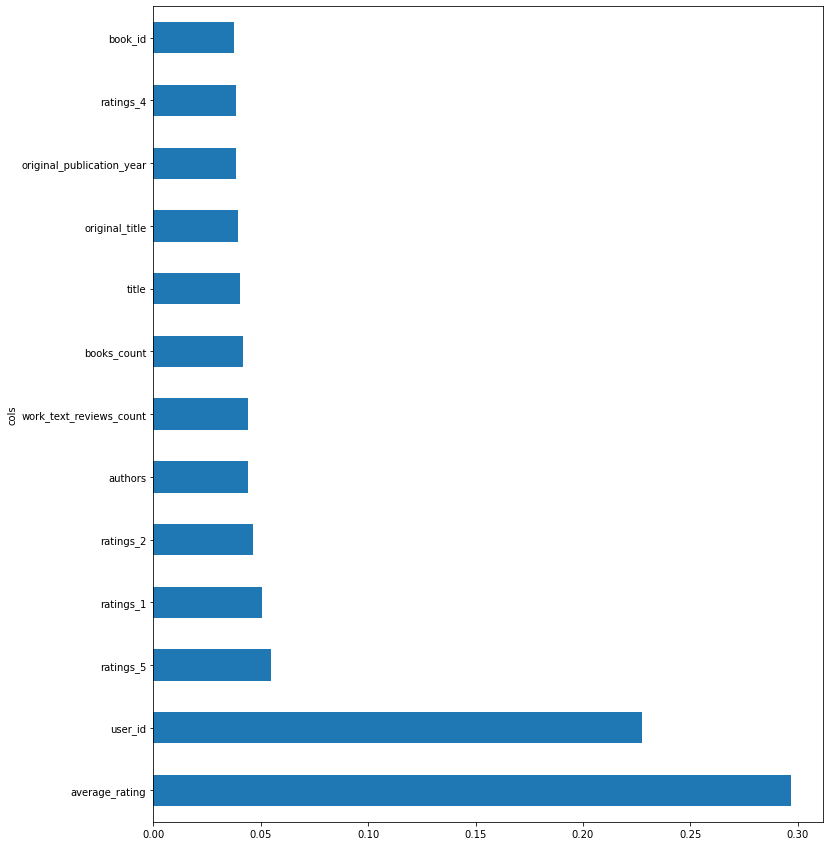

In [86]:
plot_fi(rf_feat_importance(m, xs_imp));

User_id and average_rating are by far the most important features. Which makes sense since if you know how a user rates and how a book is rated in general, you can get a good idea what the rating of this user for this book will look like.

In [87]:
#xs_imp.columns.to_series().to_csv('save/13_features.csv', index=False, header=False)

In [88]:
to_keep = imp[:33].cols
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [89]:
m = rf(xs_imp, y)
m_mse(m, xs_imp, y), m_mse(m, valid_xs_imp, valid_y)

(0.890756008250006, 0.9078710829450982)

In [90]:
#save_pickle('save/rf_33_features', m)

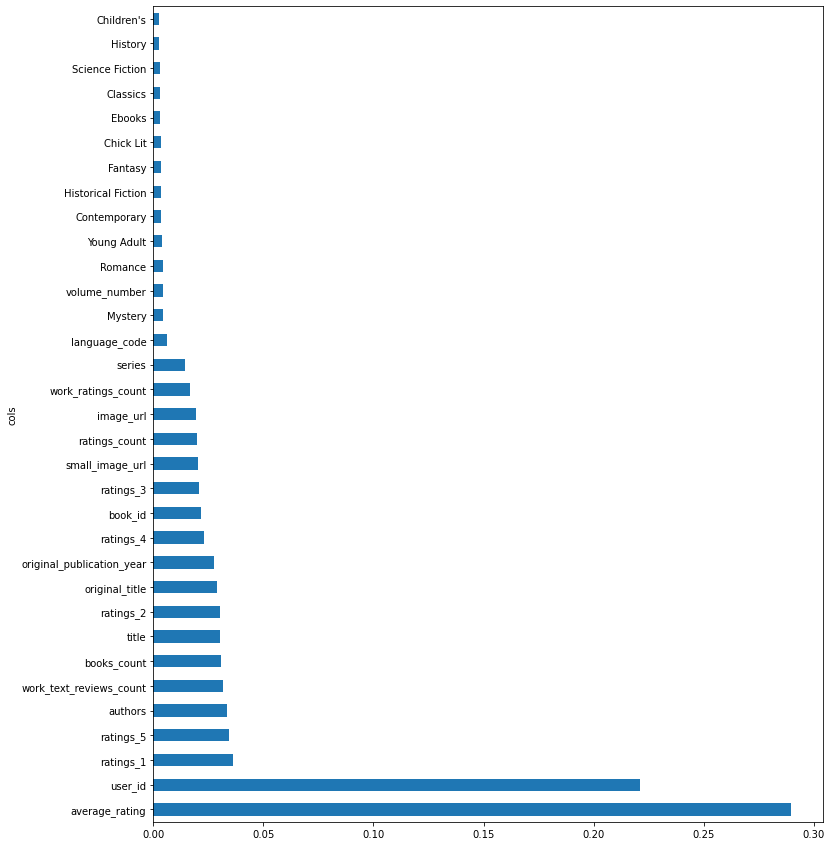

In [91]:
plot_fi(rf_feat_importance(m, xs_imp));

In [92]:
#xs_imp.columns.to_series().to_csv('save/33_features.csv', index=False, header=False)

In [14]:
#keep = pd.read_csv('save/33_features.csv', header=None)[0].values
#xs_imp = xs[keep]
#valid_xs_imp = valid_xs[keep]

In [93]:
len(xs.columns), len(xs_imp.columns)

(62, 33)

By keeping 33 features, we removed lots of genres. I thought that some less popular genres were underreprenseted considering the fact I use 30% of the data for training and baggings of only 40 trees with 100 000 bootstrapped samples.

To check if I didn't remove anything too crazy, I retrained u sing the validation set (70% of the data) and with bootstraps of its size.

In [94]:
m = rf(valid_xs_imp, valid_y, max_samples=None)
m_mse(m, xs_imp, y), m_mse(m, valid_xs_imp, valid_y)

(0.933551373720652, 0.8034857996306192)

In [13]:
m = rf(valid_xs, valid_y, max_samples=None)
m_mse(m, xs, y), m_mse(m, valid_xs, valid_y)

(0.9335167604001013, 0.802423349738707)

Remember now the validation set is our training set (so the "validation" MSE is on the left).
We have very slightly worse MSE using only the important features, so we can keep them as is.

We are left with a few very well-known genres and some meta information about the book.

### Similar columns

In [95]:
from scipy.cluster import hierarchy as hc

In [96]:
def cluster_columns(df, figsize=(15,15), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()

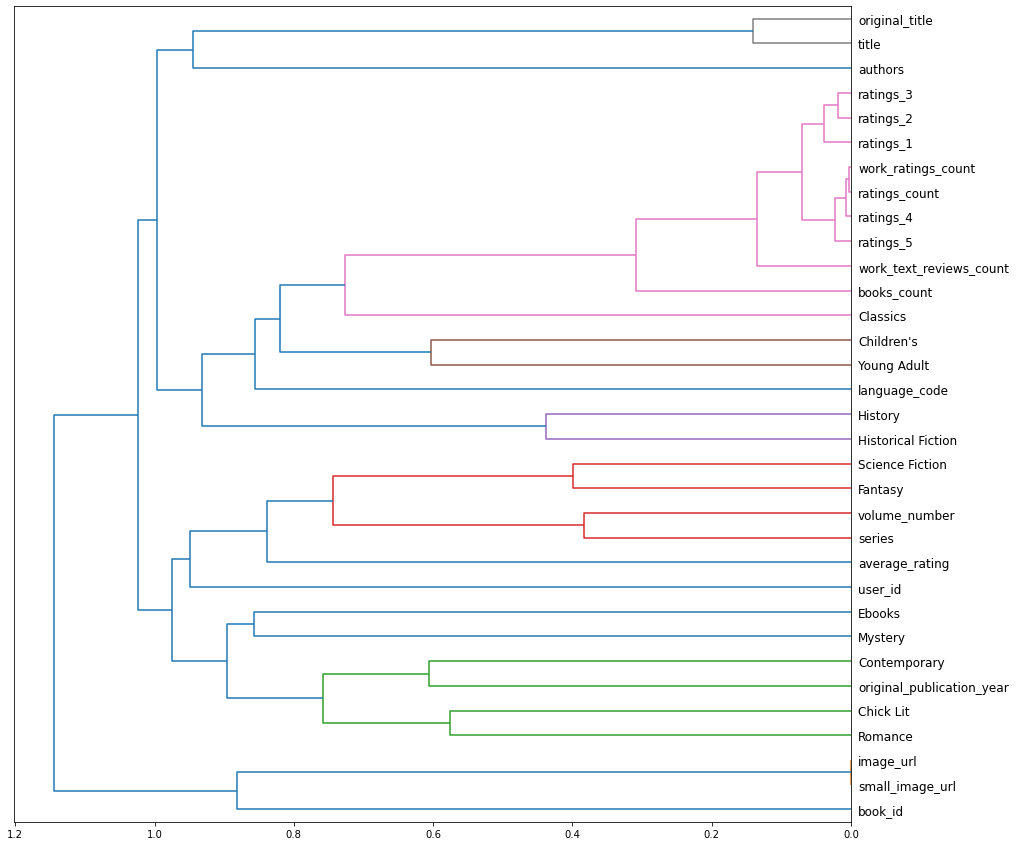

In [97]:
cluster_columns(xs_imp)

Small_image_url and image_url, title and original title and all rating related features (except average_rating) are pretty similar in their behavior.
Let's see what happens if we remove one of each pair.

In [98]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
        max_samples=50000, max_features=0.5, n_jobs=-1, oob_score=True, random_state=42)
    m.fit(df, y)
    return m.oob_score_

oob_score_ is the same as R² metric. 1 is good (perfect model, explains 100% of the variance in the dependent variable), 0 is bad (no variance explained at all).

In [99]:
get_oob(xs_imp)

0.07621259552254656

Well that is not a great R² score. Meaning our model is either false or doesn't explain much of the variance in the dependent variable.

In [100]:
{c: get_oob(xs_imp.drop(c , axis=1)) for c in (
    'small_image_url', 'image_url',
    'title', 'original_title',
    'ratings_5', 'ratings_1', 'ratings_2', 'ratings_4', 'ratings_3', 'work_ratings_count', 'ratings_count'
)}

{'small_image_url': 0.07596316414108473,
 'image_url': 0.07596316414108473,
 'title': 0.07605440638838246,
 'original_title': 0.07599297536421135,
 'ratings_5': 0.07592779539060146,
 'ratings_1': 0.07584352215979195,
 'ratings_2': 0.07607943655357552,
 'ratings_4': 0.07595734887657091,
 'ratings_3': 0.07583096579900672,
 'work_ratings_count': 0.07580769980410496,
 'ratings_count': 0.07595416180561154}

Let's see what droping small_image_url, original_title, series and keeping one of each group (ratings >= 4, ratings <= 3, (work_)rating_counts) does to our R² and MSE.

In [104]:
to_drop = ['small_image_url', 'original_title', 'ratings_count', 'ratings_4', 'ratings_2']
get_oob(xs_imp.drop(to_drop, axis=1))

0.07607965571890907

In [105]:
m = rf(xs_imp.drop(to_drop, axis=1), y)
m_mse(m, xs_imp.drop(to_drop, axis=1), y), m_mse(m, valid_xs_imp.drop(to_drop, axis=1), valid_y)

(0.8906465782024182, 0.907720112601842)

Our R² and MSE are around the same.

Ebooks isn't a genre and shouldn't be here, so I'll drop it.

In [106]:
to_drop += ['Ebooks']

In [107]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [108]:
m = rf(xs_final, y)
m_mse(m, xs_final, y), m_mse(m, valid_xs_final, valid_y)

(0.8908752644973963, 0.9077475391037773)

In [109]:
#save_pickle('save/rf_simple_0_907.pkl', m)

In [110]:
#xs_final.columns.to_series().to_csv('save/final_features.csv', index=False, header=False)

In [10]:
#final_features = pd.read_csv('save/final_features.csv', header=None)[0].values

Let's evaluate the model on the validation set with more trees and bigger samples see what we can get.

In [111]:
m = rf(valid_xs_final, valid_y, n_estimators=100, max_samples=None)
m_mse(m, xs_final, y), m_mse(m, valid_xs_final, valid_y)

(0.9313839629549998, 0.8017468293654721)

Weirdly we have worse performance than our simpler model.

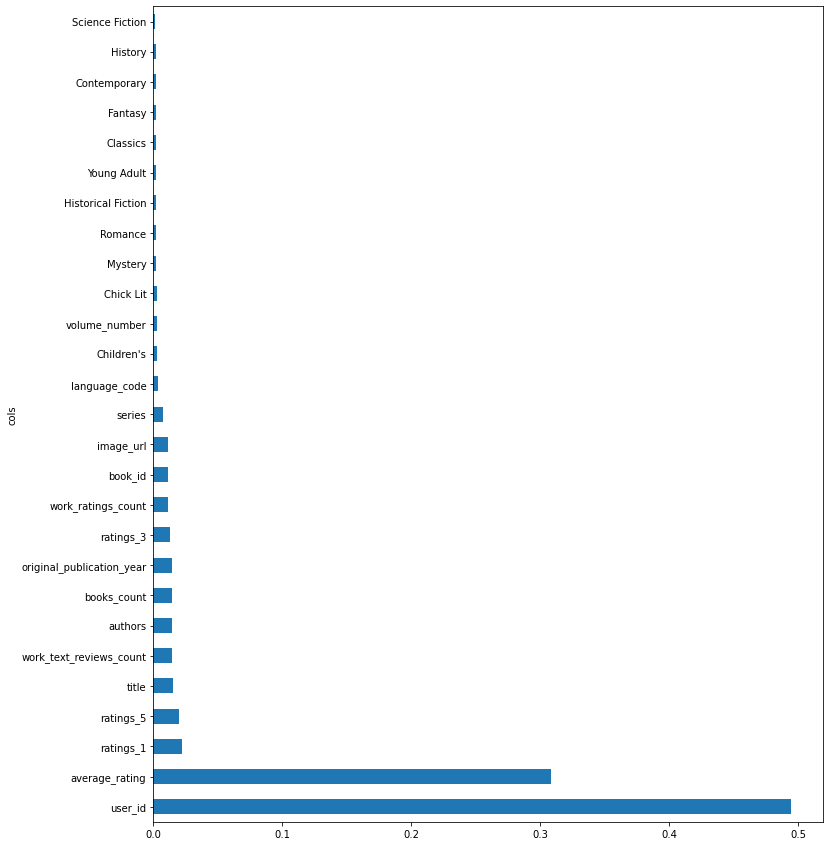

In [112]:
plot_fi(rf_feat_importance(m, xs_final));

In [113]:
#save_pickle('save/rf_complete_0_931.pkl', m)

I think we are done removing redundant or irrelevant columns.

In [114]:
len(xs_final.columns), len(book_tab.all_col_names)

(27, 69)

# Further analysis

In [115]:
len(book_data['image_url'].unique()), len(book_data)

(6669, 10000)

At first view, not all images are unique.

In [116]:
book_data.groupby('image_url').size()

image_url
https://images.gr-assets.com/books/1156897088m/350.jpg                                         1
https://images.gr-assets.com/books/1159814395m/2095.jpg                                        1
https://images.gr-assets.com/books/1163789140m/3478.jpg                                        1
https://images.gr-assets.com/books/1165519096m/5367.jpg                                        1
https://images.gr-assets.com/books/1166154337m/10365.jpg                                       1
                                                                                            ... 
https://images.gr-assets.com/books/1502300279m/43886.jpg                                       1
https://images.gr-assets.com/books/1502523710m/192510.jpg                                      1
https://images.gr-assets.com/books/1503066414m/19501.jpg                                       1
https://images.gr-assets.com/books/1503127212m/10889279.jpg                                    1
https://s.gr-assets.

Let's see what that last image is
![](https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png)

In [117]:
len(book_data['image_url'].unique()) + book_data.groupby('image_url').size().max() - 1

10000

Seems like images are unique, except for missing images.

image_url was part of the important features and it may encode something.

In [118]:
m = load_pickle('save/rf_simple_0_907.pkl')

Let's see a histogram of each image (encoded value) on the validation set.

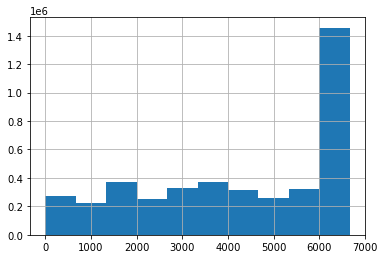

In [119]:
valid_xs_final['image_url'].hist();

In [121]:
default_image = book_data.groupby('image_url').size().index[-1]
default_image_encode = book_tab.classes['image_url'].o2i[default_image]
default_image_encode

6669

Our default_image is the most represented.

In [122]:
default_mask = valid_xs_final['image_url'] == default_image_encode
valid_y[default_mask].mean(), valid_y[~default_mask].mean()

(3.8998185174592446, 3.9257470849723686)

The mean of ratings with or without the default image doesn't seem that different.

Let's plot the partial dependence of image_url (predict rating swith our model by fixing image_url to one value, getting the mean and so on for all image_url values)

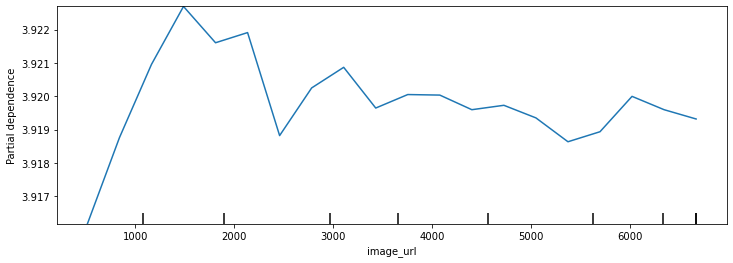

In [123]:
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, valid_xs_final, ['image_url'],
                        grid_resolution=20, ax=ax);

Not sure we can conclude anything about the default image but small encoded values result in lower ratings. (Even though the whole thing is in a range of less than 0.01)

**Let's plot the partial dependence of each variable**

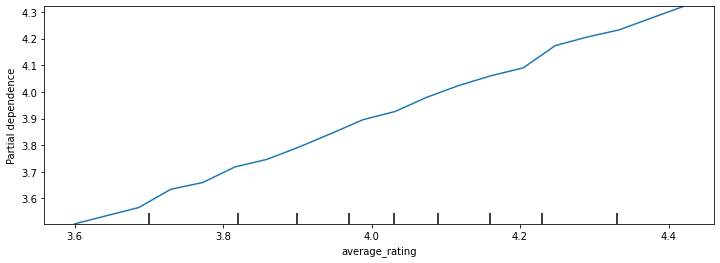

In [124]:
fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, valid_xs_final, ['average_rating'],
                        grid_resolution=20, ax=ax);

Can't see much because average_rating makes the score vary so largly.

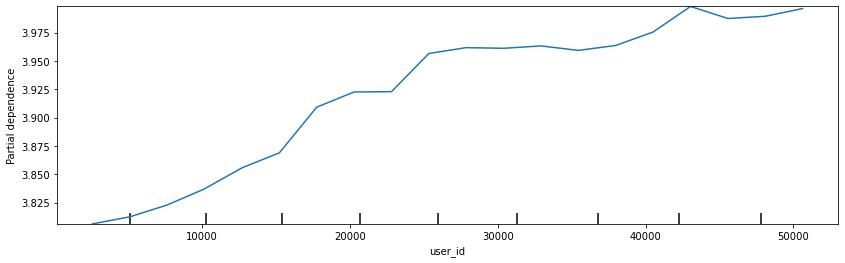

In [125]:
fig,ax = plt.subplots(figsize=(14, 4))
plot_partial_dependence(m, valid_xs_final, ['user_id'],
                        grid_resolution=20, ax=ax);

In [126]:
features = list(valid_xs_final.columns)
features.remove('average_rating')
features.remove('user_id')

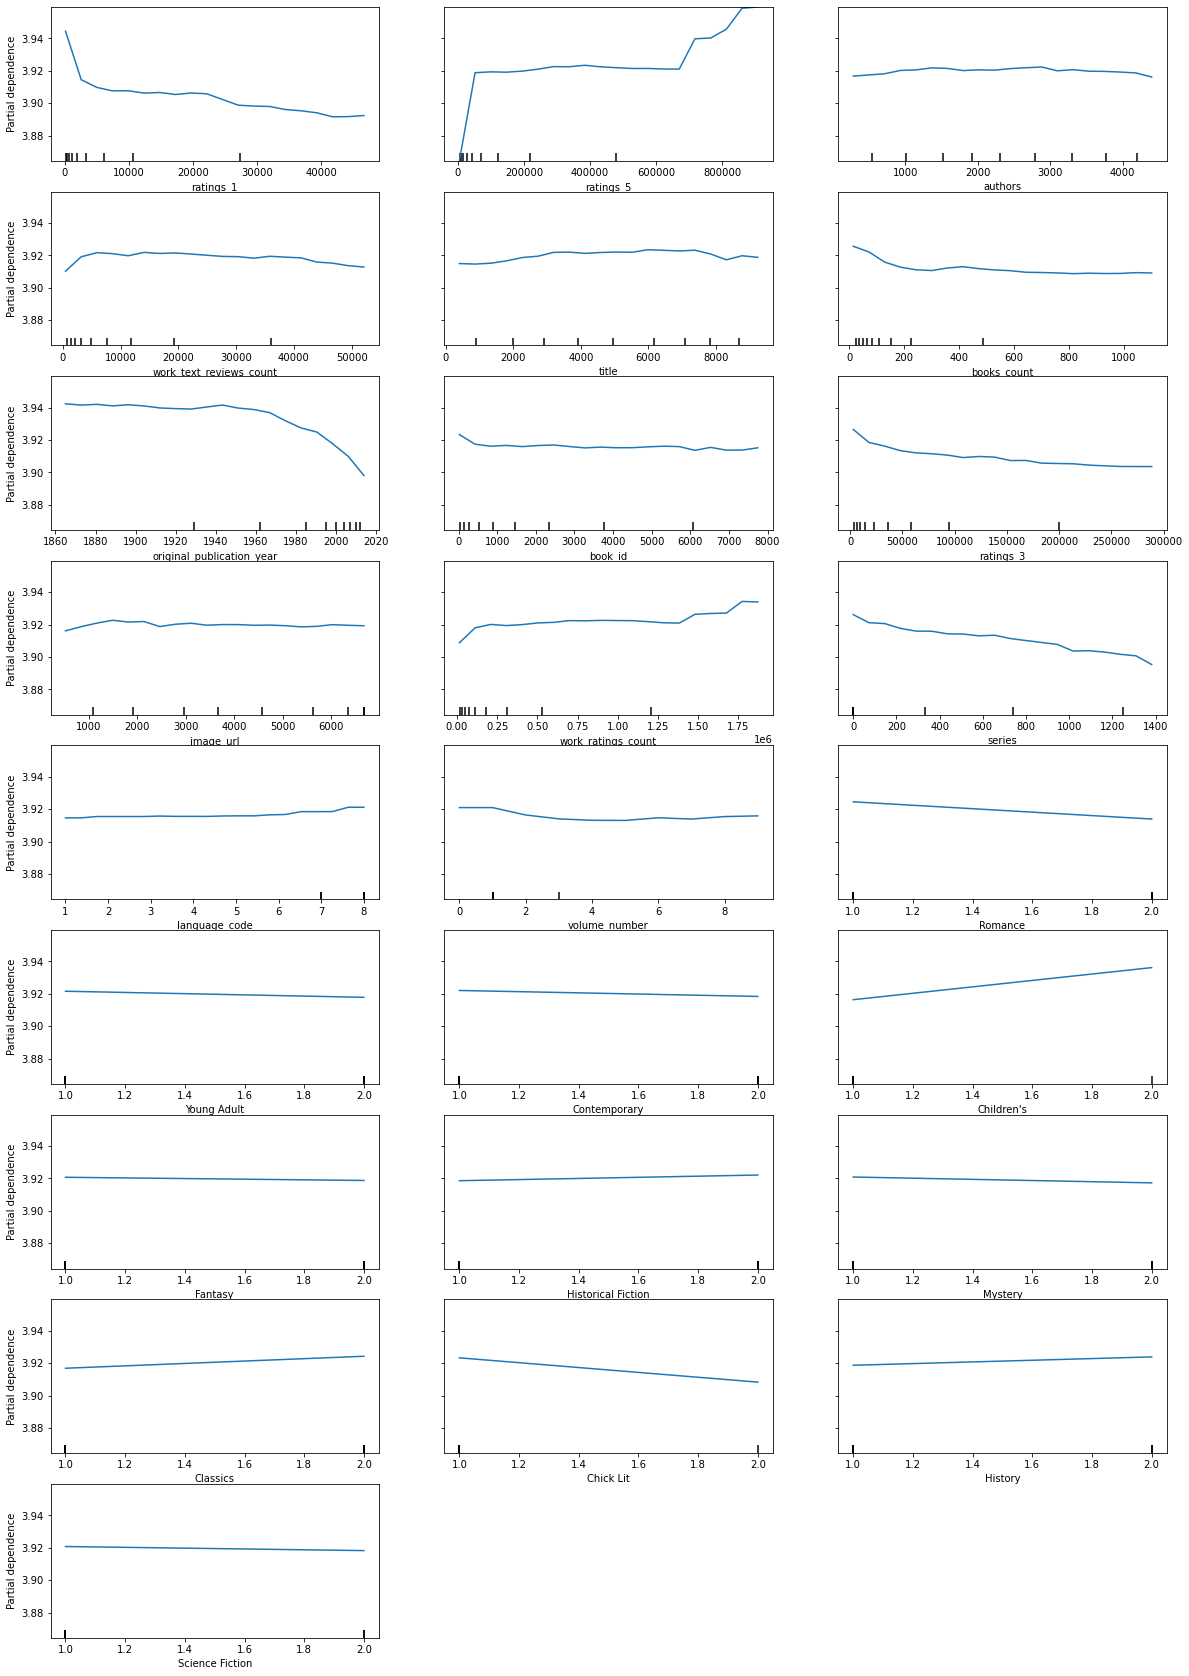

In [133]:
fig,ax = plt.subplots(figsize=(20, 30))
plot_partial_dependence(m, valid_xs_final, features,
                        grid_resolution=20, ax=ax);

In [128]:
book_tab.classes['Chick Lit'].o2i

defaultdict(int, {'#na#': 0, 0: 1, 1: 2})

In [129]:
book_tab.classes['language_code'][8]

'eng'

Expected facts:
- positive linear-like relationship between average_rating and rating.
- negative linear-like relationship between ratings_1 and rating.

Interesting facts:
- Ratings_5 seem to have a negative impact when there are few and a positive one when there are lots (none in between).
- volume_number from 2 to 4 linearly decreases rating but more makes it go up a little again.
- negative linear-like relationship between ratings_1 and rating.
- Positive linear-like relationship between user_id and rating.
- The more books, the lower the rating.
- Negative linear-like relationship between book_id and rating.
- Newer books are get worse rating.
- Author seem to increase and then decrease.
- ratings_count have an increase on ratings only after a certain threshold.
- Genres: Chick Lit, Romance, Young adult, Contemporary, Mystery, Science Fiction decrease more or less the rating.
- Genres: Children, History, Classics, Historical Fiction, Fantasy increase rating.
- Books in english are better rated.

# What about new book?

Some columns such as average_rating, ratings_1 etc. seem to be very important.
Our model **won't generalize well** to new books (new books won't have many ratings etc.)

We will build a new very simple model and general model without ratings, counts, ids or image_url indicator.

This simple model will predict the average rating of the book using all genres indicators.

In [134]:
re_rating = re.compile('.*ratings.*')
re_count = re.compile('.*count.*')
re_id = re.compile('.*(id$|isbn)')
re_image = re.compile('.*image_url$')
re_title = re.compile('.*title$') # We remove title since we don't extract anything from it (they act like an id)
indep_var = [v for v in book_with_genres.columns if not (re_rating.match(v) or re_count.match(v) or re_id.match(v) or re_image.match(v) or re_title.match(v))]
indep_var.remove('Ebooks')
indep_var

['authors',
 'original_publication_year',
 'language_code',
 'average_rating',
 'series',
 'volume_number',
 'Art',
 'Biography',
 'Business',
 'Chick Lit',
 "Children's",
 'Christian',
 'Classics',
 'Comics',
 'Contemporary',
 'Cookbooks',
 'Crime',
 'Fantasy',
 'Fiction',
 'Gay and Lesbian',
 'Graphic Novels',
 'Historical Fiction',
 'History',
 'Horror',
 'Humor and Comedy',
 'Manga',
 'Memoir',
 'Music',
 'Mystery',
 'Nonfiction',
 'Paranormal',
 'Philosophy',
 'Poetry',
 'Psychology',
 'Religion',
 'Romance',
 'Science',
 'Science Fiction',
 'Self Help',
 'Suspense',
 'Spirituality',
 'Sports',
 'Thriller',
 'Travel',
 'Young Adult']

In [135]:
procs = [Categorify, FillMissing]

In [136]:
dep_var = 'average_rating'

In [137]:
continuous, categorical = cont_cat_split(book_with_genres[indep_var], 2, dep_var=dep_var)

In [138]:
continuous

['original_publication_year', 'volume_number']

In [139]:
categorical

['authors',
 'language_code',
 'series',
 'Art',
 'Biography',
 'Business',
 'Chick Lit',
 "Children's",
 'Christian',
 'Classics',
 'Comics',
 'Contemporary',
 'Cookbooks',
 'Crime',
 'Fantasy',
 'Fiction',
 'Gay and Lesbian',
 'Graphic Novels',
 'Historical Fiction',
 'History',
 'Horror',
 'Humor and Comedy',
 'Manga',
 'Memoir',
 'Music',
 'Mystery',
 'Nonfiction',
 'Paranormal',
 'Philosophy',
 'Poetry',
 'Psychology',
 'Religion',
 'Romance',
 'Science',
 'Science Fiction',
 'Self Help',
 'Suspense',
 'Spirituality',
 'Sports',
 'Thriller',
 'Travel',
 'Young Adult']

In [140]:
msk = np.random.rand(len(book_with_genres)) < 0.8
train_idx = np.where(msk)[0]
valid_idx = np.where(~msk)[0]
splits = (list(train_idx), list(valid_idx))

In [141]:
book_avg_tab = TabularPandas(book_with_genres[indep_var], procs, categorical, continuous, y_names=dep_var, splits=splits)

In [142]:
len(book_avg_tab.train), len(book_avg_tab.valid)

(8027, 1973)

In [143]:
xs = book_avg_tab.train.xs
valid_xs = book_avg_tab.valid.xs

y = book_avg_tab.train.y
valid_y = book_avg_tab.valid.y

In [144]:
rf = partial(rf, max_samples = 5000)

In [145]:
m = rf(xs, y)
m_mse(m, xs, y), m_mse(m, valid_xs, valid_y)

(0.04010629758851852, 0.04878769551553803)

Good MSE !

**Let's see if an image regressor would have any predictive power**

In [69]:
from fastai.vision.all import *

In [70]:
image_data = book_data[['image_url', 'average_rating']].copy()

In [71]:
im_dir = Path()/'save/images'
im_dir.mkdir(parents=True, exist_ok=True)

In [72]:
image_data['path'] = im_dir.as_posix() + '/' + book_data['title'] + '.jpg'

In [73]:
image_data

,image_url,average_rating,path
0,https://images.gr-assets.com/books/1447303603m/2767052.jpg,4.34,"save/images/The Hunger Games (The Hunger Games, #1).jpg"
1,https://images.gr-assets.com/books/1474154022m/3.jpg,4.44,"save/images/Harry Potter and the Sorcerer's Stone (Harry Potter, #1).jpg"
2,https://images.gr-assets.com/books/1361039443m/41865.jpg,3.57,"save/images/Twilight (Twilight, #1).jpg"
3,https://images.gr-assets.com/books/1361975680m/2657.jpg,4.25,save/images/To Kill a Mockingbird.jpg
4,https://images.gr-assets.com/books/1490528560m/4671.jpg,3.89,save/images/The Great Gatsby.jpg
...,...,...,...
9995,https://images.gr-assets.com/books/1307445460m/7130616.jpg,4.09,"save/images/Bayou Moon (The Edge, #2).jpg"
9996,https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png,4.25,"save/images/Means of Ascent (The Years of Lyndon Johnson, #2).jpg"
9997,https://images.gr-assets.com/books/1455373531m/77431.jpg,4.35,save/images/The Mauritius Command.jpg
9998,https://images.gr-assets.com/books/1279214118m/8565083.jpg,3.65,save/images/Cinderella Ate My Daughter: Dispatches from the Frontlines of the New Girlie-Girl Culture.jpg


In [74]:
import urllib.request

In [75]:
def download_images(urls, im_paths):
    for url, im_path in zip(urls, im_paths):
        try:
            urllib.request.urlretrieve(url, filename=f"{im_path}")
            filename += 1
        except Exception as exc:
            print(f"Exception occued while downloading image from url {url}, path: {im_path} -- {str(exc)}")

In [76]:
#download_images(image_data.image_url, image_data.path)

Some variables seem to indicate pretty much the same thing, such as ids, title and original_title, images etc.
We will try to remove redundant features.

In [77]:
def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()